# Analyse de données 

## Unification des données

In [1]:
import json
import glob
import pandas as pd
import numpy as np
from scipy.stats import gmean
import matplotlib.pyplot as plt

# Dictionnaire pour stocker les données de tous les fichiers JSON
acheteurs = []
vendeurs = []

# Chemin vers le répertoire de données
path = '../data/*.json'

# Parcourir tous les fichiers JSON dans le dossier
for file_name in glob.glob(path):
    with open(file_name, 'r') as f:
        # Charger les données du fichier JSON
        json_data = json.load(f)
        donnee_demographique = json_data['donnee_demographique']
        if ~donnee_demographique['statut'].find('vendeur'):
            vendeur = {};
            vendeur.update(donnee_demographique)
            vendeur.update(json_data['vendeur'])
            vendeurs.append(vendeur)
        if ~donnee_demographique['statut'].find('acheteur'):
            acheteur = {};
            acheteur.update(donnee_demographique)
            acheteur.update(json_data['acheteur'])
            acheteurs.append(acheteur)

### Évaluer l’état actuel du commerce électronique en RDC, y compris les défis auxquels sont confrontés les vendeurs et les acheteurs

In [5]:
def recupere_element_plus_utilise(element, cle, titre="Répartition des éléments"):
    element = element.explode(cle)
    value_counts = element.value_counts()
    total = value_counts.sum()
    
    value_counts_df = pd.DataFrame(value_counts)
    value_counts_df.columns = ['Total']
    value_counts_df['Proportion (%)'] = (value_counts / total) * 100
    
    # tableau
    display(value_counts_df)
    # Création du graphique
    value_counts_df['Total'].plot(kind='bar')
    plt.title(titre)
    plt.xlabel('Élément')
    plt.ylabel('Total')
    plt.show()
    
def calculer_mesures(df):
    df = df.apply(pd.to_numeric, errors='coerce')
    
    # Calculer la moyenne arithmétique
    moyenne_arithmetique = df.mean()
    # Calculer la variance
    variance = df.var()
    # Calculer l'écart-type
    ecart_type = df.std()
    
    # Créer un dataframe pour les résultats
    resultats = pd.DataFrame({
        'Moyenne Arithmétique': moyenne_arithmetique,
        'Variance': variance,
        'Écart-Type': ecart_type
    },['valeurs'])
    display(resultats)

display(pd.DataFrame(vendeurs))
display(pd.DataFrame(acheteurs))
display(pd.DataFrame({
    'Vendeurs': [len(vendeurs)],
    'Acheteurs': [len(acheteurs)],
}, ['Nombre']))



,date_de_naissance,genre,commune,niveau_education,statut,numbers,duree_activite,type_produits_services,reseaux_sociaux_vendre,nombre_articles_achetes_vente,nombre_articles_vendus,nombre_abonnes_pages,nombre_vues_moyen_publication,paiement,systeme_livraison,defis_commerce_electronique,coords
0,"Sun, 22 Dec 1968 18:03:14 GMT",femme,maluku,diplome_d_etudes_primaires,vendeur,[0800289247],3_mois,[alimentation_boissons],[facebook],2168,1013,[{'facebook': '4517'}],[{'facebook': '3531'}],[virement_bancaire],pas_de_livraison,"[faible_penetration_internet, difficultes_atti...",NaN
1,"Sat, 16 Dec 1995 18:03:14 GMT",homme,ndjili,diplome_d_etudes_secondaires,vendeur_et_acheteur,[0800893433],moins_de_3_mois,"[automobile_accessoires, beaute_soins_personne...","[youtube, snapchat, twitter, whatsapp, faceboo...",1416,1246,"[{'youtube': '415'}, {'snapchat': '1848'}, {'t...","[{'youtube': '122'}, {'snapchat': '459'}, {'tw...","[carte_bancaire, orange_money, cheque, airtel_...",livraison_domicile_transporteur,[manque_infrastructures_paiement_electroniques...,NaN
2,"Wed, 03 Jul 2002 23:00:00 GMT",homme,matete,diplome_d_etudes_secondaires,vendeur_et_acheteur,[0800993262],plus_de_3_mois,[autres],"[facebook, whatsapp]",10,10,"[{'facebook': '1400'}, {'whatsapp': ''}]","[{'facebook': ''}, {'whatsapp': '174'}]","[orange_money, cheque, virement_bancaire, mpes...",livraison_domicile_transporteur,[difficultes_attirer_fideliser_clients],"{'latitude': -4.3923504, 'longitude': 15.3378167}"
3,"Mon, 19 Dec 1983 18:03:14 GMT",femme,makala,pas_de_diplome,vendeur,[0801003818],plus_de_3_mois,"[automobile_accessoires, electroniques_informa...","[whatsapp, snapchat, facebook, likee, youtube,...",3045,219,"[{'whatsapp': '3063'}, {'snapchat': '2791'}, {...","[{'whatsapp': '377'}, {'snapchat': '2449'}, {'...","[airtel_money, orange_money, afrimoney_africel...",pas_de_livraison,"[problemes_adressage_livraison, manque_infrast...",NaN
4,"Sun, 18 Dec 1988 15:46:19 GMT",femme,kimbanseke,diplome_d_etudes_secondaires,vendeur,[0801287300],moins_de_3_mois,"[vetements_accessoires, automobile_accessoires]",[instagram],795,10,[{'instagram': '1593'}],[{'instagram': '815'}],"[afrimoney_africell, cheque, orange_money, air...",livraison_point_relais,"[faible_penetration_internet, manque_infrastru...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,"Sat, 22 Dec 1973 15:46:19 GMT",femme,mont-ngafula,diplome_d_etudes_superieures,vendeur,[0979564436],plus_de_3_mois,"[beaute_soins_personnels, automobile_accessoir...",[youtube],581,103,[{'youtube': '4450'}],[{'youtube': '495'}],"[afrimoney_africell, virement_bancaire, airtel...",livraison_point_relais,"[difficultes_attirer_fideliser_clients, manque...",NaN
482,"Sun, 22 Dec 1968 18:03:14 GMT",homme,ngaba,diplome_d_etudes_superieures,vendeur,[0979625042],3_mois,"[automobile_accessoires, autres, fournitures_s...",[telegram],1078,700,[{'telegram': '313'}],[{'telegram': '222'}],"[virement_bancaire, afrimoney_africell, cheque...",livraison_point_relais,[manque_confiance_consommateurs_commerce_elect...,NaN
483,"Tue, 04 Dec 2007 23:00:00 GMT",homme,gombe,diplome_universitaire,vendeur_et_acheteur,[],3_mois,"[vetements_accessoires, beaute_soins_personnels]","[instagram, facebook, twitter, youtube, telegram]",20,10,"[{'instagram': '500'}, {'facebook': '5000'}, {...","[{'instagram': '10000'}, {'facebook': '2000'},...","[mpesa_vodacom, orange_money, carte_bancaire, ...",livraison_domicile_transporteur,[manque_infrastructures_paiement_electroniques...,"{'latitude': -4.3162397, 'longitude': 15.2831767}"
484,"Mon, 05 May 2003 23:00:00 GMT",femme,kinshasa,diplome_d_etudes_secondaires,vendeur,[],plus_de_3_mois,[vetements_accessoires],"[whatsapp, facebook, instagram]",20,16,"[{'whatsapp': '200'}, {'facebook': '500'}, {'i...","[{'whatsapp': '160'}, {'facebook': '150'}, {'i...","[especes, orange_money, virement_bancaire]",livraison_point_relais,[manque_confiance_consommateurs_commerce_elect...,"{'latitude': -4.318606447042572, 'lo

,date_de_naissance,genre,commune,niveau_education,statut,numbers,duree_activite,nombre_achats,nombre_produits_services,réseaux_sociaux,paiement,systeme_livraison,facteurs_influence,qualite_service_client,qualite_produits,recommandation,coords,rÃ©seaux_sociaux
0,"Wed, 21 Dec 1977 15:46:19 GMT",homme,kisenso,diplome_d_etudes_primaires,acheteur,[0800239143],plus_de_3_mois,798,"[alimentation_boissons, instruments_musique, f...","[snapchat, youtube, likee, instagram]","[afrimoney, virement_bancaire, carte_bancaire]",livraison_domicile,"[prix, avis_clients, qualite_produit, autre]",1,1,oui,NaN,NaN
1,"Sun, 06 Dec 1998 23:00:00 GMT",homme,bandalungwa,diplome_universitaire,acheteur,[0800601625],plus_de_3_mois,5,"[livre_medias, vetements_accessoires]",[facebook],[especes],livraison_domicile,[prix],3,3,non,NaN,NaN
2,"Sat, 16 Dec 1995 18:03:14 GMT",homme,ndjili,diplome_d_etudes_secondaires,vendeur_et_acheteur,[0800893433],3_mois,939,"[vetements_accessoires, fournitures_scolaires]",[instagram],"[carte_bancaire, orange_money, airtel_money, m...",depot_relai,"[avis_clients, qualite_produit, autre, prix]",6,3,non,NaN,NaN
3,"Wed, 03 Jul 2002 23:00:00 GMT",homme,matete,diplome_d_etudes_secondaires,vendeur_et_acheteur,[0800993262],plus_de_3_mois,10,[autres],"[facebook, whatsapp]","[orange_money, mpesa, carte_bancaire, virement...",livraison_domicile,[avis_clients],3,3,oui,"{'latitude': -4.3923504, 'longitude': 15.3378167}",NaN
4,"Mon, 17 Dec 1990 18:03:14 GMT",femme,barumbu,diplome_d_etudes_secondaires,acheteur,[0801226542],3_mois,842,"[automobile_accessoires, autres, produits_beau...","[instagram, facebook, tiktok, youtube, snapcha...","[cheque, mpesa]",livraison_domicile,"[autre, qualite_produit, prix]",2,5,non,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
716,"Sat, 06 Jul 1996 23:00:00 GMT",homme,lemba,diplome_d_etudes_superieures,acheteur,[],moins_de_3_mois,4,"[vetements_accessoires, appareils_electronique...",NaN,"[airtel_money, mpesa, orange_money, carte_banc...",livraison_domicile,"[prix, qualite_produit]",3,4,oui,"{'latitude': -4.3166755, 'longitude': 15.2717302}","[facebook, whatsapp, telegram, instagram]"
717,"Sat, 28 Jun 2003 23:00:00 GMT",homme,mont-ngafula,diplome_d_etudes_secondaires,acheteur,[],plus_de_3_mois,1,[vetements_accessoires],NaN,[especes],livraison_domicile,[autre],3,3,oui,"{'latitude': -4.4438809, 'longitude': 15.3140331}","[instagram, facebook, whatsapp]"
718,"Tue, 11 Dec 2007 23:00:00 GMT",homme,kalamu,diplome_universitaire,acheteur,[],moins_de_3_mois,3,[vetements_accessoires],NaN,"[especes, mpesa]",livraison_domicile,[prix],3,3,oui,"{'latitude': -4.351135, 'longitude': 15.3165943}","[facebook, whatsapp]"
719,"Tue, 04 Dec 2007 23:00:00 GMT",homme,gombe,diplome_universitaire,vendeur_et_acheteur,[],3_mois,10,[appareils_electroniques_informatiques],NaN,"[airtel_money, carte_bancaire, cheque]",livraison_domicile,[qualite_produit],3,5,non,"{'latitude': -4.3162397, 'longitude': 15.2831767}","[youtube, whatsapp]"


,Vendeurs,Acheteurs
Nombre,486,721


#### Vendeurs

,Moyenne Arithmétique,Variance,Écart-Type
valeurs,353.849802,114518.1837,338.405354


,Moyenne Arithmétique,Variance,Écart-Type
valeurs,181.280632,45168.289981,212.528327


,Total,Proportion (%)
vetements_accessoires,164,18.201998
electroniques_informatiques,135,14.983352
autres,126,13.984462
beaute_soins_personnels,114,12.652608
instruments_musique,107,11.875694
fournitures_scolaires,91,10.099889
automobile_accessoires,85,9.433962
alimentation_boissons,79,8.768036


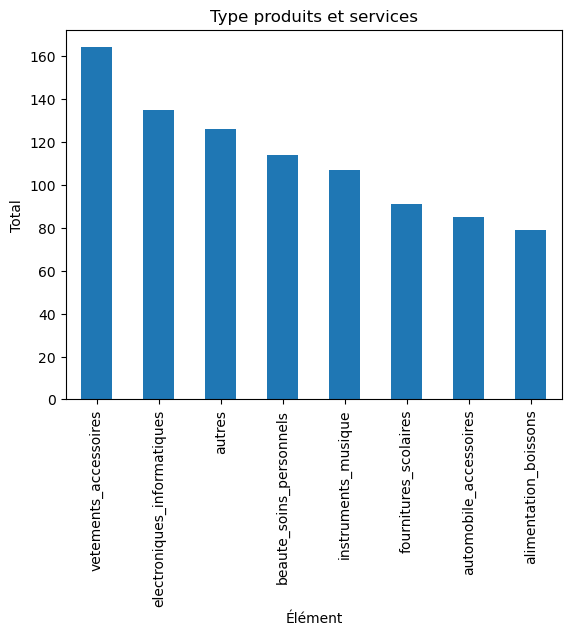

,Total,Proportion (%)
whatsapp,162,15.835777
facebook,144,14.076246
instagram,138,13.489736
tiktok,110,10.752688
telegram,105,10.263930
twitter,99,9.677419
youtube,98,9.579668
likee,89,8.699902
snapchat,78,7.624633


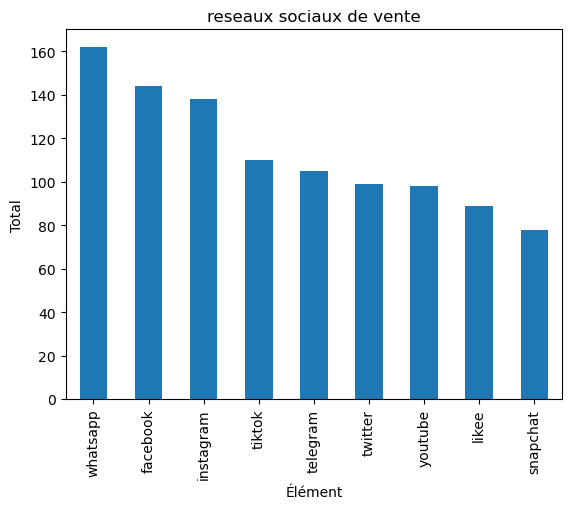

,Total,Proportion (%)
mpesa_vodacom,170,20.047170
orange_money,129,15.212264
virement_bancaire,117,13.797170
airtel_money,113,13.325472
carte_bancaire,105,12.382075
cheque,105,12.382075
afrimoney_africell,86,10.141509
especes,23,2.712264


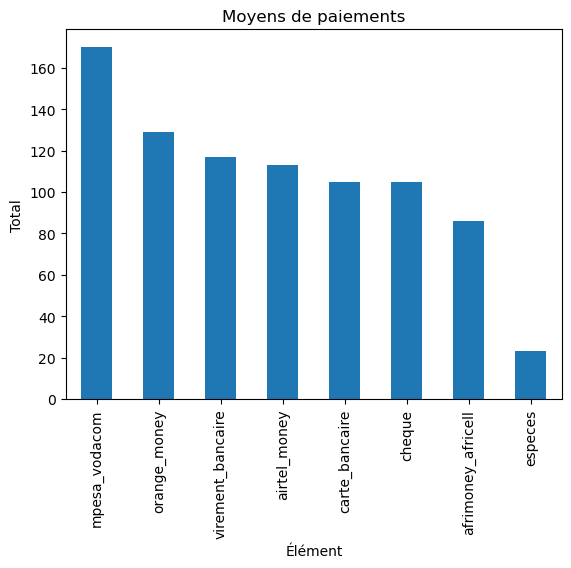

,Total,Proportion (%)
livraison_domicile_transporteur,124,49.011858
livraison_point_relais,70,27.667984
pas_de_livraison,59,23.320158


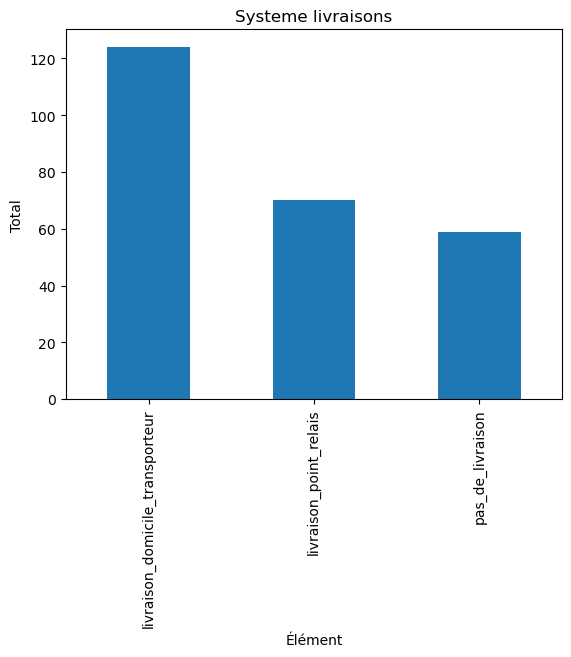

,Total,Proportion (%)
manque_confiance_consommateurs_commerce_electronique,165,24.193548
difficultes_attirer_fideliser_clients,152,22.287390
faible_penetration_internet,127,18.621701
problemes_adressage_livraison,127,18.621701
manque_infrastructures_paiement_electroniques_appropriees,111,16.275660


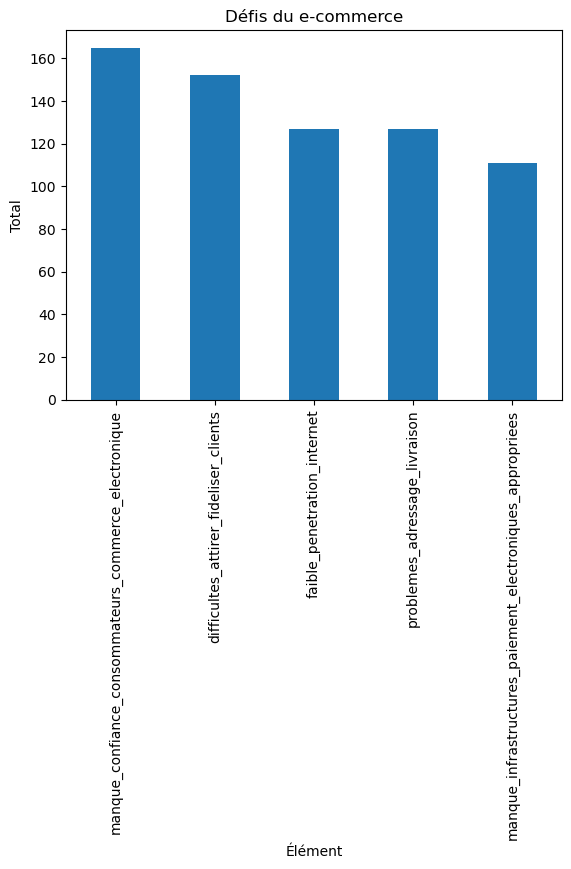

In [3]:
import pandas as pd
import ast

# Convertir les données en DataFrame pour une analyse facile
df_vendeurs = pd.DataFrame(vendeurs)

# Afficher les premières lignes du DataFrame pour vérifier les données
#display(df)

# Évaluer l'état actuel du commerce électronique

type_produits_services = df_vendeurs['type_produits_services']
reseaux_sociaux_vendres = df_vendeurs['reseaux_sociaux_vendre']
nombre_articles_achetes_vente = df_vendeurs['nombre_articles_achetes_vente']
nombre_articles_vendus = df_vendeurs['nombre_articles_vendus']
paiements = df_vendeurs['paiement']
systeme_livraisons = df_vendeurs['systeme_livraison']
defis_commerce_electroniques = df_vendeurs['defis_commerce_electronique'];


calculer_mesures(nombre_articles_achetes_vente)
calculer_mesures(nombre_articles_vendus)

recupere_element_plus_utilise(
    type_produits_services, 
    'type_produits_services',
    'Type produits et services'
)

recupere_element_plus_utilise(
    reseaux_sociaux_vendres, 
    'reseaux_sociaux_vendre',
    'reseaux sociaux de vente'
)
recupere_element_plus_utilise(
    paiements,
    'paiement',
    'Moyens de paiements'
)
recupere_element_plus_utilise(
    systeme_livraisons,
    'systeme_livraison',
    'Systeme livraisons'
)
recupere_element_plus_utilise(
    defis_commerce_electroniques,
    'defis_commerce_electronique',
    'Défis du e-commerce'
)


#### Achteurs

,Moyenne Arithmétique,Variance,Écart-Type
valeurs,175.979955,87370.394687,295.584835


,Total,Proportion (%)
vetements_accessoires,266,22.278057
autres,209,17.504188
appareils_electroniques_informatiques,153,12.814070
livre_medias,119,9.966499
produits_beaute_soins_personnels,110,9.212730
fournitures_scolaires,90,7.537688
instruments_musique,88,7.370184
alimentation_boissons,83,6.951424
automobile_accessoires,76,6.365159


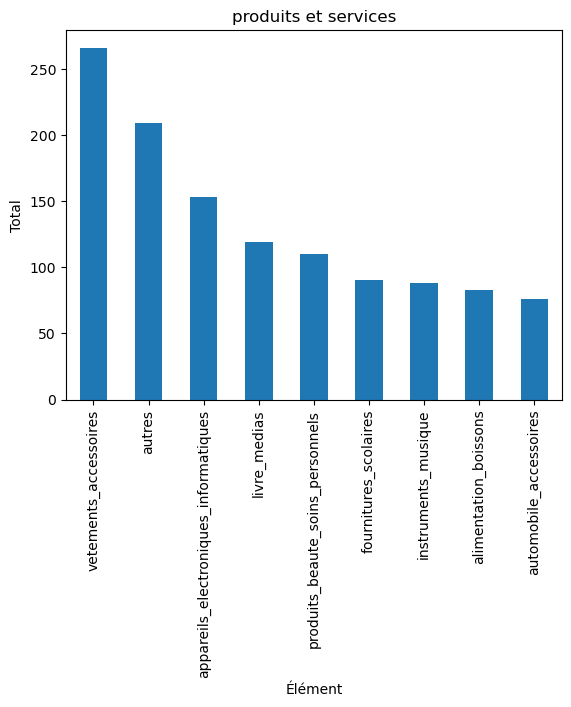

,Total,Proportion (%)
facebook,292,20.709220
whatsapp,291,20.638298
instagram,188,13.333333
telegram,143,10.141844
tiktok,137,9.716312
youtube,97,6.879433
snapchat,91,6.453901
likee,88,6.241135
twitter,83,5.886525


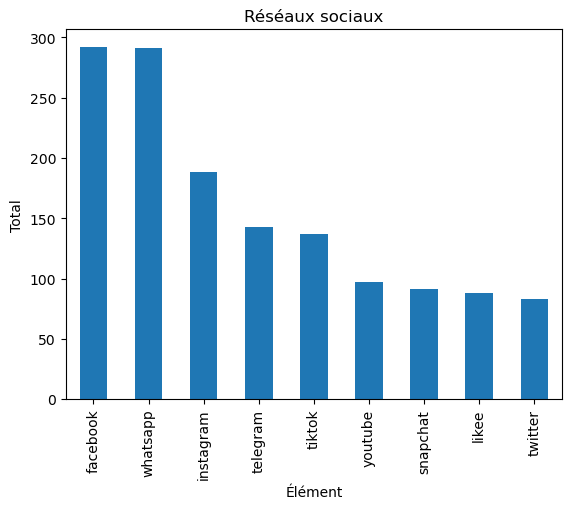

,Total,Proportion (%)
mpesa,239,22.675522
orange_money,162,15.370019
especes,129,12.239089
carte_bancaire,123,11.669829
airtel_money,122,11.574953
virement_bancaire,119,11.290323
cheque,81,7.685009
afrimoney,79,7.495256


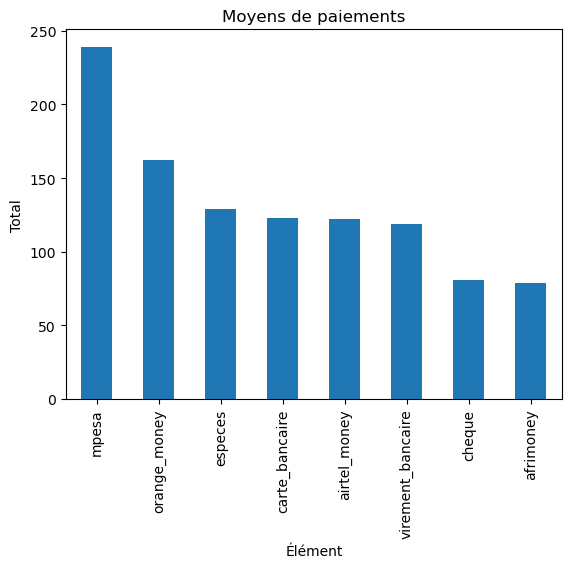

,Total,Proportion (%)
livraison_domicile,258,57.461024
autre,88,19.599109
recuperation_magasin,65,14.476615
depot_relai,38,8.463252


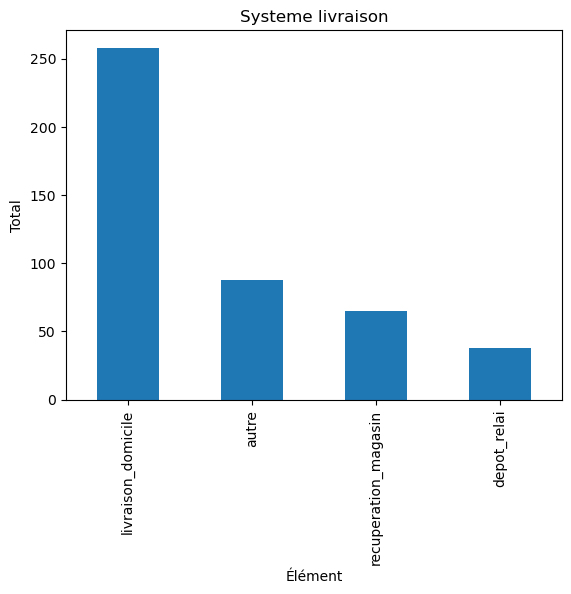

,Total,Proportion (%)
qualite_produit,291,34.933974
prix,232,27.851140
avis_clients,164,19.687875
autre,146,17.527011


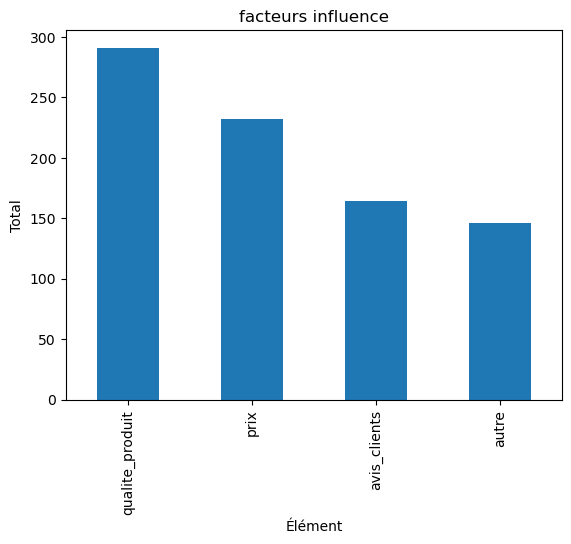

,Total,Proportion (%)
oui,251,55.902004
non,198,44.097996


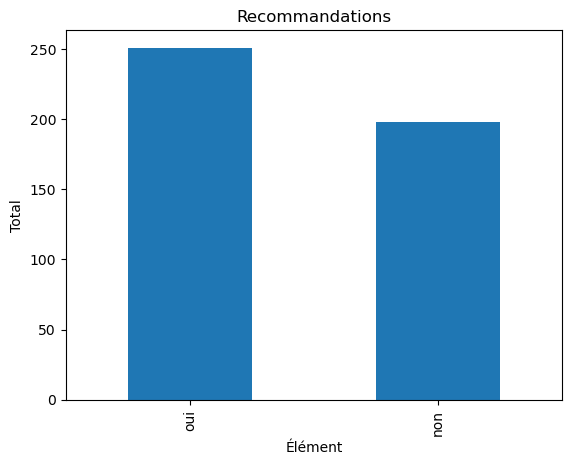

In [4]:
df_acheteurs = pd.DataFrame(acheteurs)

nombre_achats = df_acheteurs['nombre_achats']
produits_services = df_acheteurs['nombre_produits_services']
reseaux_sociaux = df_acheteurs['réseaux_sociaux']
paiements = df_acheteurs['paiement']
systeme_livraisons = df_acheteurs['systeme_livraison']
facteurs_influences = df_acheteurs['facteurs_influence']
recommandations = df_acheteurs['recommandation']

calculer_mesures(nombre_achats)

recupere_element_plus_utilise(
    produits_services,
    'produits_services',
    'produits et services'
)


recupere_element_plus_utilise(
    reseaux_sociaux,
    'reséaux_sociaux',
    'Réséaux sociaux'
)

recupere_element_plus_utilise(
    paiements,
    'paiement',
    'Moyens de paiements'
)

recupere_element_plus_utilise(
    systeme_livraisons,
    'systeme_livraison',
    'Systeme livraison'
)

recupere_element_plus_utilise(
    facteurs_influences,
    'facteurs_influence',
    'facteurs influence'
)

recupere_element_plus_utilise(
    recommandations,
    'recommandation',
    'Recommandations'
)

### Identifier les plateformes de commerce électronique les plus populaires en RDC et évaluer leur efficacité en termes de visibilité et de facilité d’utilisation pour les vendeurs et les acheteurs

In [5]:
def moyenne_reseaux_sociaux_vendre_page (df, key='nombre_abonnes_pages') :
    nombre_abonnes_pages = df[key]
    nombre_abonnes_pages = nombre_abonnes_pages.explode(key)
    reseaux = []
    abonnes = []
    for data in nombre_abonnes_pages:
        for key, value in data.items():
            reseaux.append(key)
            abonnes.append(value)
    nombre_abonnes_pages = pd.DataFrame({
        'reseaux': reseaux,
        'abonnes': abonnes
    })
    nombre_abonnes_pages['abonnes'] = nombre_abonnes_pages['abonnes'].apply(pd.to_numeric, errors='coerce') 
    nombre_abonnes_pages = nombre_abonnes_pages.groupby('reseaux')['abonnes'].mean()
    display(nombre_abonnes_pages.sort_values(ascending=False))
    
    
moyenne_reseaux_sociaux_vendre_page(df_vendeurs) 
moyenne_reseaux_sociaux_vendre_page(df_vendeurs, 'nombre_vues_moyen_publication')


#reseaux_sociaux_vendres = reseaux_sociaux_vendres.explode('nombre_abonnes_pages')
#reseaux_sociaux_vendres = reseaux_sociaux_vendres.groupby('nombre_abonnes_pages')


reseaux
snapchat     3003.692308
youtube      2891.285714
telegram     2692.095238
likee        2468.775281
twitter      2390.686869
tiktok       2351.318182
facebook     2245.847222
instagram    2103.550725
whatsapp     1974.098684
Name: abonnes, dtype: float64

reseaux
snapchat     1525.551282
instagram    1475.297101
youtube      1445.030612
twitter      1271.717172
telegram     1260.676190
tiktok       1208.424242
likee        1181.134831
facebook     1053.674797
whatsapp      755.947020
Name: abonnes, dtype: float64